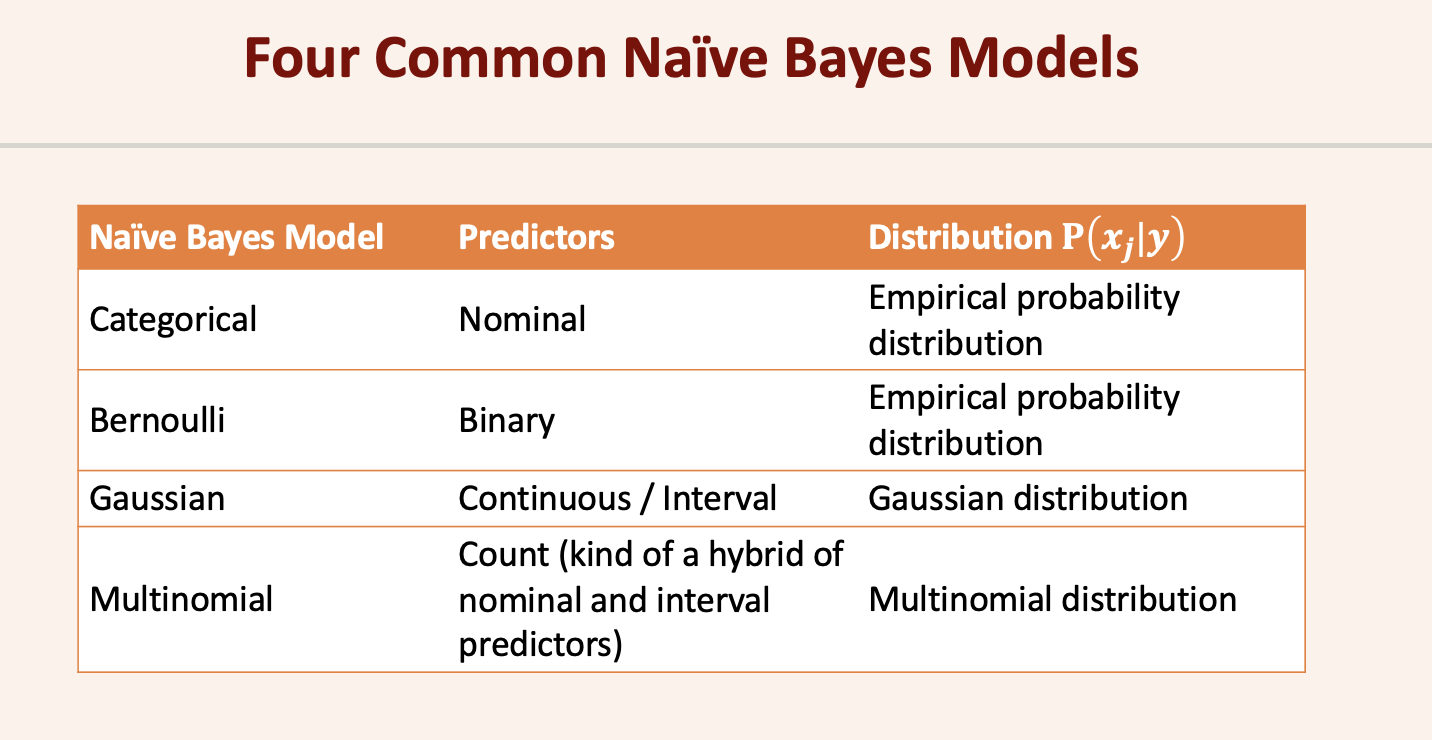


## Name: Week 5 EBilling Naive Bayes.py
- 'CreditCard', 'Gender', 'JobCategory', 'EBilling' are categorical

In [10]:

import numpy
import pandas
import sys

# Set some options for printing all the columns
numpy.set_printoptions(precision = 10, threshold = sys.maxsize)
numpy.set_printoptions(linewidth = numpy.inf)

pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)

pandas.options.display.float_format = '{:,.10f}'.format

from sklearn import preprocessing, naive_bayes

# Define a function to visualize the percent of a particular target category by a nominal predictor
def RowWithColumn (
   rowVar,          # Row variable
   columnVar,       # Column predictor
   show = 'ROW'):   # Show ROW fraction, COLUMN fraction, or BOTH table

   countTable = pandas.crosstab(index = rowVar, columns = columnVar, margins = False, dropna = True)
   print("Frequency Table: \n", countTable)
   print( )

   if (show == 'ROW' or show == 'BOTH'):
       rowFraction = countTable.div(countTable.sum(1), axis='index')
       print("Row Fraction Table: \n", rowFraction)
       print( )

   if (show == 'COLUMN' or show == 'BOTH'):
       columnFraction = countTable.div(countTable.sum(0), axis='columns')
       print("Column Fraction Table: \n", columnFraction)
       print( )

   return

inputData = pandas.read_excel('CustomerSurveyData.xlsx')

inputData.head()

,CustomerID,Region,TownSize,Gender,Age,EducationYears,JobCategory,UnionMember,EmploymentLength,Retired,HouseHoldIncome,DebtToIncomeRatio,CreditDebt,OtherDebt,LoanDefault,MaritalStatus,HouseholdSize,NumberPets,NumberCats,NumberDogs,NumberBirds,HomeOwner,CarsOwned,CarOwnership,CarBrand,CarValue,CommuteTime,PoliticalPartyMember,Votes,CreditCard,CardTenure,CardItemsMonthly,CardSpendMonth,ActiveLifestyle,PhoneCoTenure,VoiceLastMonth,VoiceOverTenure,EquipmentRental,EquipmentLastMonth,EquipmentOverTenure,CallingCard,MobileData,MobileDataLastMonth,MobileDataOverTenure,MultiLine,VoiceMail,Pager,InternetProvider,CallerID,CallWait,CallForward,ThreeWayCalling,EBilling,TVWatchingHours,OwnsPC,OwnsMobileDevice,OwnsGameSystem,OwnsFax,NewsSubscriber
0,0002-GTOKLU-YVY,5,4.0000000000,Male,63,16,Sales,No,3,No,61000,3.3000000000,0.1429230000,1.8700770000,No,Married,2.0000000000,3.0000000000,2.0000000000,1.0000000000,0.0000000000,1.0000000000,1,Own,Domestic,"26,000.0000000000",24.0000000000,No,Yes,American Express,11,10,"4,330.0000000000",No,21,15.4500000000,106.1500000000,Yes,36.9000000000,753.6500000000,Yes,Yes,35.3000000000,658.3500000000,Yes,Yes,Yes,Satellite,Yes,Yes,No,Yes,Yes,18,Yes,No,Yes,Yes,No
1,0003-RLTRGE-IW2,1,1.0000000000,Male,52,11,Professional,No,14,No,85000,2.0000000000,0.3570000000,1.3430000000,No,Unmarried,1.0000000000,2.0000000000,2.0000000000,0.0000000000,0.0000000000,1.0000000000,5,Own,Domestic,"43,100.0000000000",27.0000000000,No,No,American Express,15,6,"4,454.0000000000",No,31,34.6500000000,380.3500000000,No,0.0000000000,0.0000000000,Yes,Yes,21.4500000000,621.9000000000,No,No,No,DSL,Yes,Yes,Yes,No,No,20,Yes,No,No,No,No
2,0003-UTGKPR-PRU,2,2.0000000000,Male,73,14,Professional,Yes,11,No,39000,13.1000000000,1.5837900000,3.5252100000,No,Unmarried,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,5,Lease,Domestic,"10,000.0000000000",41.0000000000,Yes,No,Visa,31,10,"2,376.6000000000",No,54,48.9000000000,879.8500000000,No,0.0000000000,0.0000000000,Yes,No,NaN,NaN,No,No,No,NaN,No,No,Yes,No,No,13,No,No,No,No,Yes
3,0008-ZIQQOT-SGB,3,1.0000000000,Female,40,21,Sales,No,3,No,138000,6.2000000000,2.2331160000,6.3228840000,No,Married,3.0000000000,8.0000000000,1.0000000000,4.0000000000,0.0000000000,1.0000000000,2,Own,Domestic,"66,200.0000000000",16.0000000000,Yes,Yes,American Express,1,6,"5,552.1000000000",Yes,1,6.4500000000,2.1500000000,Yes,42.8000000000,42.8000000000,Yes,Yes,30.0500000000,30.0500000000,No,Yes,Yes,NaN,Yes,Yes,Yes,Yes,Yes,24,Yes,Yes,No,Yes,No
4,0012-CIVYLF-839,4,5.0000000000,Male,40,12,Labor,No,9,No,63000,25.1000000000,3.5421120000,12.2708880000,Yes,Married,2.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,5,Own,Domestic,"39,300.0000000000",35.0000000000,No,No,Discover,17,15,"6,335.3000000000",No,48,34.9500000000,619.0000000000,No,0.0000000000,0.0000000000,Yes,No,NaN,NaN,No,No,No,NaN,No,No,No,No,No,17,No,No,No,No,No


In [20]:
inputData['Region'].value_counts()
inputData[['CreditCard', 'Gender', 'JobCategory', 'EBilling']].isna().sum()
#inputData.columns

CreditCard      0
Gender         33
JobCategory    15
EBilling        0
dtype: int64

In [21]:
# EBilling -> CreditCard, Gender, JobCategory
subData = inputData[['CreditCard', 'Gender', 'JobCategory', 'EBilling']].dropna()

catEBilling = subData['EBilling'].unique()
catCreditCard = subData['CreditCard'].unique()
catGender = subData['Gender'].unique()
catJobCategory = subData['JobCategory'].unique()

print('Unique Values of EBilling: \n', catEBilling)
print('Unique Values of CreditCard: \n', catCreditCard)
print('Unique Values of Gender: \n', catGender)
print('Unique Values of JobCategory: \n', catJobCategory)

Unique Values of EBilling: 
 ['Yes' 'No']
Unique Values of CreditCard: 
 ['American Express' 'Visa' 'Discover' 'MasterCard' 'Others']
Unique Values of Gender: 
 ['Male' 'Female']
Unique Values of JobCategory: 
 ['Sales' 'Professional' 'Labor' 'Crafts' 'Agriculture' 'Service']


In [23]:
subData['CreditCard'].value_counts()

CreditCard
Discover            1331
Visa                1235
MasterCard          1184
American Express     981
Others               221
Name: count, dtype: int64

In [24]:
RowWithColumn(rowVar = subData['EBilling'], columnVar = subData['CreditCard'], show = 'ROW')
RowWithColumn(rowVar = subData['EBilling'], columnVar = subData['Gender'], show = 'ROW')
RowWithColumn(rowVar = subData['EBilling'], columnVar = subData['JobCategory'], show = 'ROW')


Frequency Table: 
 CreditCard  American Express  Discover  MasterCard  Others  Visa
EBilling                                                        
No                       591       788         815     173   854
Yes                      390       543         369      48   381

Row Fraction Table: 
 CreditCard  American Express     Discover   MasterCard       Others         Visa
EBilling                                                                        
No              0.1834833903 0.2446445203 0.2530270102 0.0537100279 0.2651350512
Yes             0.2253032929 0.3136915078 0.2131715771 0.0277296360 0.2201039861

Frequency Table: 
 Gender    Female  Male
EBilling              
No          1595  1626
Yes          895   836

Row Fraction Table: 
 Gender         Female         Male
EBilling                          
No       0.4951878299 0.5048121701
Yes      0.5170421722 0.4829578278

Frequency Table: 
 JobCategory  Agriculture  Crafts  Labor  Professional  Sales  Service
EBilling 

In [29]:
subData = subData.astype('category')
xTrain = pandas.get_dummies(subData[['CreditCard', 'Gender', 'JobCategory']], dtype = float)

yTrain = numpy.where(subData['EBilling'] == 'Yes', 1, 0)


## Incorrectly Use sklearn.naive_bayes.BernoulliNB
- because X(predictors) are categorical(nominal) **not binary**

In [30]:
# Incorrectly Use sklearn.naive_bayes.BernoulliNB

_objNB = naive_bayes.BernoulliNB(alpha = 0, force_alpha = True)
thisModel = _objNB.fit(xTrain, yTrain)

print('Probability of each class:')
print(numpy.exp(_objNB.class_log_prior_))
print('\n')

print('Empirical probability of features given a class, P(x_i|y)')
print(xTrain.columns)
print(numpy.exp(_objNB.feature_log_prob_))
print('\n')

print('Number of samples encountered for each class during fitting')
print(_objNB.class_count_)
print('\n')

print('Number of samples encountered for each (class, feature) during fitting')
print(_objNB.feature_count_)
print('\n')



Probability of each class:
[0.6504442649 0.3495557351]


Empirical probability of features given a class, P(x_i|y)
Index(['CreditCard_American Express', 'CreditCard_Discover',
       'CreditCard_MasterCard', 'CreditCard_Others', 'CreditCard_Visa',
       'Gender_Female', 'Gender_Male', 'JobCategory_Agriculture',
       'JobCategory_Crafts', 'JobCategory_Labor', 'JobCategory_Professional',
       'JobCategory_Sales', 'JobCategory_Service'],
      dtype='object')
[[0.1834833903 0.2446445203 0.2530270102 0.0537100279 0.2651350512 0.4951878299 0.5048121701 0.041601987  0.092207389  0.1471592673 0.2666873642 0.3222601676 0.1300838249]
 [0.2253032929 0.3136915078 0.2131715771 0.027729636  0.2201039861 0.5170421722 0.4829578278 0.0450606586 0.0878105142 0.1190063547 0.2957827845 0.3396880416 0.1126516464]]


Number of samples encountered for each class during fitting
[3221. 1731.]


Number of samples encountered for each (class, feature) during fitting
[[ 591.  788.  815.  173.  854. 1595. 16

In [6]:
xTest = pandas.DataFrame(numpy.zeros((1, xTrain.shape[1])), columns = xTrain.columns)

xTest[['CreditCard_American Express', 'Gender_Female', 'JobCategory_Professional']] = [1,1,1]
y_predProb = thisModel.predict_proba(xTest)

print(y_predProb)


[[0.5388177258 0.4611822742]]


## Correctly Use sklearn.naive_bayes.CategoricalNB
- **because 'CreditCard', 'Gender', 'JobCategory' are nominal not binary**

In [26]:

# Correctly Use sklearn.naive_bayes.CategoricalNB
feature = ['CreditCard', 'Gender', 'JobCategory']

labelEnc = preprocessing.LabelEncoder()
yTrain = labelEnc.fit_transform(subData['EBilling'])
yLabel = labelEnc.inverse_transform([0, 1])

uCreditCard = numpy.unique(subData['CreditCard'])
uGender = numpy.unique(subData['Gender'])
uJobCategory = numpy.unique(subData['JobCategory'])

featureCategory = [uCreditCard, uGender, uJobCategory]
print(featureCategory)


[array(['American Express', 'Discover', 'MasterCard', 'Others', 'Visa'], dtype=object), array(['Female', 'Male'], dtype=object), array(['Agriculture', 'Crafts', 'Labor', 'Professional', 'Sales', 'Service'], dtype=object)]


In [27]:
featureEnc = preprocessing.OrdinalEncoder(categories = featureCategory)
xTrain = featureEnc.fit_transform(subData[['CreditCard', 'Gender', 'JobCategory']])

_objNB = naive_bayes.CategoricalNB(alpha = 0, force_alpha = True)
thisModel = _objNB.fit(xTrain, yTrain)

print('Number of samples encountered for each class during fitting')
print(yLabel)
print(_objNB.class_count_)
print('\n')

print('Probability of each class:')
print(yLabel)
print(numpy.exp(_objNB.class_log_prior_))
print('\n')

print('Number of samples encountered for each (class, feature) during fitting')


Number of samples encountered for each class during fitting
['No' 'Yes']
[3221. 1731.]


Probability of each class:
['No' 'Yes']
[0.6504442649 0.3495557351]


Number of samples encountered for each (class, feature) during fitting


In [28]:
for i in range(3):
   print('Feature: ', feature[i])
   print(featureCategory[i])
   print(_objNB.category_count_[i])
   print('\n')

print('Empirical probability of features given a class, P(x_i|y)')
for i in range(3):
   print('Feature: ', feature[i])
   print(featureCategory[i])
   print(numpy.exp(_objNB.feature_log_prob_[i]))
   print('\n')

# CreditCard = American Express, Gender = Female, JobCategory = Professional
xTest = featureEnc.transform([['American Express', 'Female', 'Professional']])

y_predProb = thisModel.predict_proba(xTest)
print('Predicted Probability: ', yLabel, y_predProb)


Feature:  CreditCard
['American Express' 'Discover' 'MasterCard' 'Others' 'Visa']
[[591. 788. 815. 173. 854.]
 [390. 543. 369.  48. 381.]]


Feature:  Gender
['Female' 'Male']
[[1595. 1626.]
 [ 895.  836.]]


Feature:  JobCategory
['Agriculture' 'Crafts' 'Labor' 'Professional' 'Sales' 'Service']
[[ 134.  297.  474.  859. 1038.  419.]
 [  78.  152.  206.  512.  588.  195.]]


Empirical probability of features given a class, P(x_i|y)
Feature:  CreditCard
['American Express' 'Discover' 'MasterCard' 'Others' 'Visa']
[[0.1834833903 0.2446445203 0.2530270102 0.0537100279 0.2651350512]
 [0.2253032929 0.3136915078 0.2131715771 0.027729636  0.2201039861]]


Feature:  Gender
['Female' 'Male']
[[0.4951878299 0.5048121701]
 [0.5170421722 0.4829578278]]


Feature:  JobCategory
['Agriculture' 'Crafts' 'Labor' 'Professional' 'Sales' 'Service']
[[0.041601987  0.092207389  0.1471592673 0.2666873642 0.3222601676 0.1300838249]
 [0.0450606586 0.0878105142 0.1190063547 0.2957827845 0.3396880416 0.112651646

/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


# Name: Week 5 BMI Naive Bayes.py
- **'height', 'weight' are continous, then use GaussianNB**

In [38]:


import matplotlib.pyplot as plt
import numpy
import pandas
import sys

# Set some options for printing all the columns
numpy.set_printoptions(precision = 10, threshold = sys.maxsize)
numpy.set_printoptions(linewidth = numpy.inf)

pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)

pandas.options.display.float_format = '{:,.10f}'.format

from scipy.stats import norm
from sklearn import metrics, naive_bayes

# Specify the roles
feature = ['height', 'weight']
target = 'bmi_status'

# Read the Excel file
input_data = pandas.read_excel('bmi_men.xlsx')
bmi_men = input_data[feature + [target]].dropna().reset_index(drop = True)


In [39]:
bmi_men

,height,weight,bmi_status
0,1.9000000000,82,2
1,1.8000000000,83,3
2,1.4000000000,98,4
3,2.1000000000,93,2
4,1.9000000000,80,2
...,...,...,...
995,1.5000000000,100,4
996,1.5000000000,72,4
997,1.6000000000,100,4
998,2.0000000000,82,2


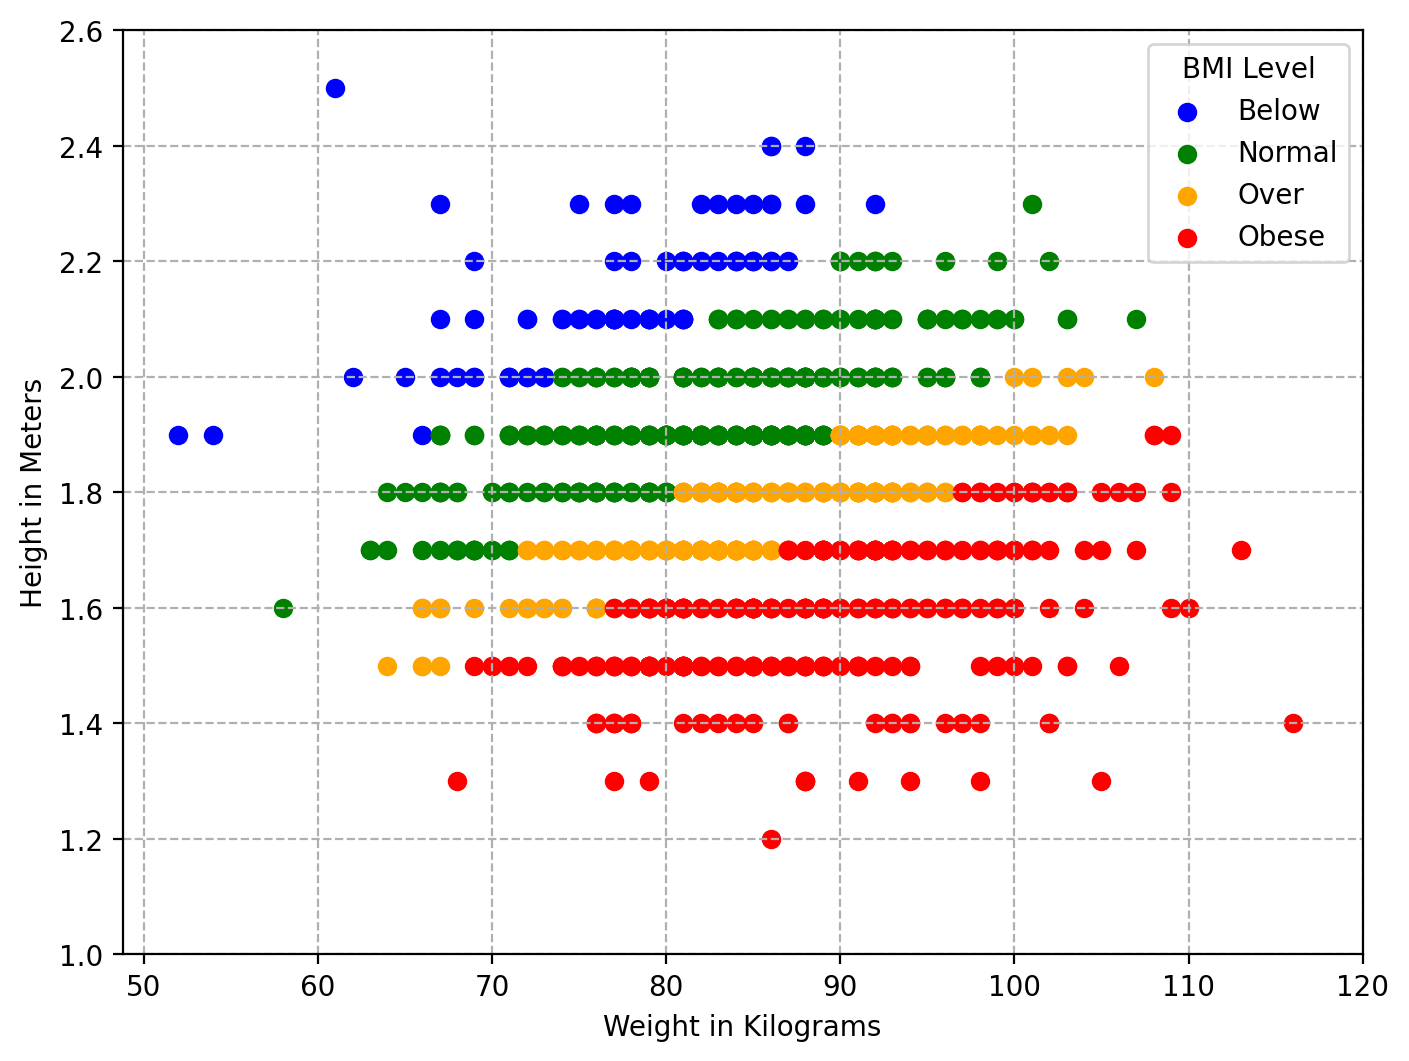

In [40]:

cmap = ['blue', 'green', 'orange', 'red']
slabel = ['Below', 'Normal', 'Over', 'Obese']
plt.figure(figsize = (8,6), dpi = 200)
for status in range(4):
    plot_data = bmi_men[bmi_men['bmi_status'] == (status+1)]
    plt.scatter(plot_data['weight'], plot_data['height'], c = cmap[status], label = slabel[status])
plt.xlabel('Weight in Kilograms')
plt.ylabel('Height in Meters')
plt.xticks(numpy.arange(50, 130, 10))
plt.yticks(numpy.arange(1.0, 2.8, 0.2))
plt.grid(axis = 'both', linestyle = '--')
plt.legend(title = 'BMI Level')
plt.show()



In [41]:
xTrain = bmi_men[feature]
yTrain = bmi_men[target].astype('category')

_objNB = naive_bayes.GaussianNB()
thisFit = _objNB.fit(xTrain, yTrain)

print('Probability of each target class')
print(thisFit.class_prior_)

print('Means of Features of each target class')
print(thisFit.theta_)

print('Variances of Features of each target class')
print(thisFit.var_)

print('Number of samples encountered for each class during fitting')
print(thisFit.class_count_)


Probability of each target class
[0.079 0.353 0.268 0.3  ]
Means of Features of each target class
[[ 2.1443037975 76.9113924051]
 [ 1.9385269122 82.2379603399]
 [ 1.7746268657 85.7537313433]
 [ 1.5826666667 89.3433333333]]
Variances of Features of each target class
[[1.5125866996e-02 5.8283288020e+01]
 [1.3246641096e-02 7.1881052016e+01]
 [9.7294242538e-03 6.5670695118e+01]
 [1.5299641427e-02 8.2105455641e+01]]
Number of samples encountered for each class during fitting
[ 79. 353. 268. 300.]


In [42]:
yTrain_predProb = _objNB.predict_proba(xTrain)

yTrain_predClass = _objNB.predict(xTrain)

confusion_matrix = metrics.confusion_matrix(yTrain, yTrain_predClass)

# Manually calculate the predicted probability
class_prob = bmi_men[target].value_counts(normalize = True).sort_index(ascending = True)

summary_height = bmi_men.groupby(target)['height'].describe()
summary_weight = bmi_men.groupby(target)['weight'].describe()

logpdf_height = norm.logpdf(1.9, loc = summary_height['mean'], scale = summary_height['std'])
logpdf_weight = norm.logpdf(82.0, loc = summary_weight['mean'], scale = summary_weight['std'])

logpdf = numpy.log(class_prob) + logpdf_weight + logpdf_height
my_prob = numpy.exp(logpdf)
sum_prob = numpy.sum(my_prob)
my_prob = numpy.divide(my_prob, sum_prob)

xTest = pandas.DataFrame({'height': [1.9], 'weight': [82.0]})
yTest_predProb = _objNB.predict_proba(xTest)

print(my_prob)
print(yTest_predProb)

bmi_status
1   0.0193320633
2   0.6931154593
3   0.2728436238
4   0.0147088536
Name: proportion, dtype: float64
[[0.0190144427 0.69391045   0.2725160713 0.014559036 ]]


# Name: Week 5 Nutrition Naive Bayes.py
- 'tv', 'magazine', 'friends', 'doctor', 'supps' are Binary
- **Predictors(x) are binary, then use BernouliNB**

In [35]:

import numpy
import pandas
import sys

# Set some options for printing all the columns
numpy.set_printoptions(precision = 10, threshold = sys.maxsize)
numpy.set_printoptions(linewidth = numpy.inf)

pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)

pandas.options.display.float_format = '{:,.10f}'.format

import itertools
from sklearn import preprocessing, naive_bayes

# Define a function to visualize the percent of a particular target category by a nominal predictor
def RowWithColumn (
   rowVar,          # Row variable
   columnVar,       # Column predictor
   show = 'ROW'):   # Show ROW fraction, COLUMN fraction, or BOTH table

   countTable = pandas.crosstab(index = rowVar, columns = columnVar, margins = False, dropna = True)
   print("Frequency Table: \n", countTable)
   print( )

   if (show == 'ROW' or show == 'BOTH'):
       rowFraction = countTable.div(countTable.sum(1), axis='index')
       print("Row Fraction Table: \n", rowFraction)
       print( )

   if (show == 'COLUMN' or show == 'BOTH'):
       columnFraction = countTable.div(countTable.sum(0), axis='columns')
       print("Column Fraction Table: \n", columnFraction)
       print( )

   return

# Specify the roles
feature = ['tv', 'magazine', 'friends', 'doctor']
target = 'supps'

# Read the Excel file
input_data = pandas.read_excel('Nutrition_Information.xlsx')
nutrition = input_data[feature + [target]].dropna().reset_index(drop = True)

nutrition.head()


,tv,magazine,friends,doctor,supps
0,2.0000000000,2.0000000000,1.0000000000,1.0000000000,2.0000000000
1,1.0000000000,2.0000000000,2.0000000000,1.0000000000,2.0000000000
2,1.0000000000,2.0000000000,2.0000000000,2.0000000000,1.0000000000
3,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000
4,2.0000000000,1.0000000000,2.0000000000,2.0000000000,1.0000000000


In [36]:
# Look at the row distribution
print(nutrition.groupby(target).size())

for pred in feature:
    RowWithColumn(rowVar = nutrition[target], columnVar = nutrition[pred], show = 'ROW')

# Make the binary features take values 0 and 1 (was 2=No and 1=Yes)
nutrition[feature] = 2 - nutrition[feature]

xTrain = nutrition[feature].astype('category')
yTrain = nutrition[target].astype('category')

_objNB = naive_bayes.BernoulliNB(alpha = 0, force_alpha = True)
thisFit = _objNB.fit(xTrain, yTrain)

print('Probability of each class')
print(numpy.exp(thisFit.class_log_prior_))

print('Empirical probability of features given a class, P(x_i|y)')
print(numpy.exp(thisFit.feature_log_prob_))

print('Number of samples encountered for each class during fitting')
print(thisFit.class_count_)

print('Number of samples encountered for each (class, feature) during fitting')
print(thisFit.feature_count_)

yTrain_predProb = _objNB.predict_proba(xTrain)

# Create the all possible combinations of the features' values
xTest = pandas.DataFrame(list(itertools.product([0,1], repeat = len(feature))), columns = feature)

# Score the xTest and append the predicted probabilities to the xTest
yTest_predProb = pandas.DataFrame(_objNB.predict_proba(xTest), columns = ['P_suppsYes', 'P_suppsNo'])
yTest_score = pandas.concat([xTest, yTest_predProb], axis = 1)


supps
1.0000000000     66
2.0000000000    107
dtype: int64
Frequency Table: 
 tv            1.0000000000  2.0000000000
supps                                   
1.0000000000            34            32
2.0000000000            51            56

Row Fraction Table: 
 tv            1.0000000000  2.0000000000
supps                                   
1.0000000000  0.5151515152  0.4848484848
2.0000000000  0.4766355140  0.5233644860

Frequency Table: 
 magazine      1.0000000000  2.0000000000
supps                                   
1.0000000000            42            24
2.0000000000            62            45

Row Fraction Table: 
 magazine      1.0000000000  2.0000000000
supps                                   
1.0000000000  0.6363636364  0.3636363636
2.0000000000  0.5794392523  0.4205607477

Frequency Table: 
 friends       1.0000000000  2.0000000000
supps                                   
1.0000000000            22            44
2.0000000000            30            77

Row Fraction Ta

# Name: Week 5 Cuisine Naive Bayes.py

In [44]:

import numpy
import pandas
import sys

# Set some options for printing all the columns
numpy.set_printoptions(precision = 10, threshold = sys.maxsize)
numpy.set_printoptions(linewidth = numpy.inf)

pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)

pandas.options.display.float_format = '{:,.10f}'.format

from sklearn import naive_bayes

cuisine = pandas.read_csv('Cuisine.csv')

keyword = ['Carolina','French','Korean','New York','Peking','Philly','Texas', \
           'Barbecue','Duck','Macaron','Souffle','Toast','Steak']
cuisine

,Item,American Cuisine
0,Carolina Barbecue,Yes
1,French Duck Confit,No
2,French Macaron,No
3,French Souffle,No
4,French Toast,Yes
5,Korean Barbecue,No
6,Korean Steak,No
7,New York Strip Steak,Yes
8,Philly Cheese Steak,Yes
9,Texas Barbecue,Yes


In [46]:

def auxfunc (item, kwd):
   return item.find(kwd)

X_train = pandas.DataFrame(columns = keyword)
for col in keyword:
   X_train[col] = numpy.where(cuisine['Item'].apply(auxfunc, kwd = col) > -1, 1, 0)

print(X_train.sum(axis = 0))

y_train = cuisine['American Cuisine'].map({'Yes': 1, 'No': 0})
print(y_train.value_counts())

x_tab = X_train.join(y_train).groupby('American Cuisine').sum()


Carolina    1
French      4
Korean      2
New York    1
Peking      1
Philly      1
Texas       1
Barbecue    3
Duck        1
Macaron     1
Souffle     1
Toast       1
Steak       4
dtype: int64
American Cuisine
0    6
1    5
Name: count, dtype: int64


In [48]:

classifier = naive_bayes.MultinomialNB(alpha = 1.0).fit(X_train, y_train)
print('Alpha Value = ', classifier.alpha)

print('Class Count:\n', classifier.class_count_)
print('Log Class Probability:\n', classifier.class_log_prior_ )
print('Feature Count (before adding alpha):\n', classifier.feature_count_)
print('Log Feature Probability:\n', classifier.feature_log_prob_)

Alpha Value =  1.0
Class Count:
 [6. 5.]
Log Class Probability:
 [-0.6061358036 -0.7884573604]
Feature Count (before adding alpha):
 [[0. 3. 2. 0. 1. 0. 0. 1. 1. 1. 1. 0. 2.]
 [1. 1. 0. 1. 0. 1. 1. 2. 0. 0. 0. 1. 2.]]
Log Feature Probability:
 [[-3.2188758249 -1.8325814637 -2.1202635362 -3.2188758249 -2.5257286443 -3.2188758249 -3.2188758249 -2.5257286443 -2.5257286443 -2.5257286443 -2.5257286443 -3.2188758249 -2.1202635362]
 [-2.4423470354 -2.4423470354 -3.1354942159 -2.4423470354 -3.1354942159 -2.4423470354 -2.4423470354 -2.0368819273 -3.1354942159 -3.1354942159 -3.1354942159 -2.4423470354 -2.0368819273]]


In [49]:
y_predProb = classifier.predict_proba(X_train)
print('Predicted Conditional Probability (Training):', y_predProb)

new_item = pandas.DataFrame({'Item': ['Peking Duck','Texas Toast']})

X_test = pandas.DataFrame(index = new_item['Item'], columns = keyword)
for col in keyword:
   X_test[col] = numpy.where(new_item['Item'].apply(auxfunc, kwd = col) > -1, 1, 0)

print('Predicted Conditional Probability (Testing):\n', classifier.predict_proba(X_test))


Predicted Conditional Probability (Training): [[0.2529285202 0.7470714798]
 [0.8024777195 0.1975222805]
 [0.8024777195 0.1975222805]
 [0.8024777195 0.1975222805]
 [0.5038895063 0.4961104937]
 [0.6701150639 0.3298849361]
 [0.7529058275 0.2470941725]
 [0.3367996604 0.6632003396]
 [0.3367996604 0.6632003396]
 [0.2529285202 0.7470714798]
 [0.6701150639 0.3298849361]]
Predicted Conditional Probability (Testing):
 [[0.8024777195 0.1975222805]
 [0.202500957  0.797499043 ]]
